---

$$\text{Whiteboard Implementation in a Google-Colab Enviroment }$$
$$\text{with a simple Handmade Pixel-Art Drawings Classificator}$$

---

> *- Jonathan Cruz*

---

# **Packages and project functions**

In [1]:
import os
import random
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.linear_model import Perceptron
from sklearn.model_selection import learning_curve, cross_val_score

SEED = 101

In [2]:
def plot_learning_curve(model, X, y):
    train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5)

    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    plt.plot(train_sizes, train_mean, 'tomato', label="Training Accuracy", lw=3)
    plt.plot(train_sizes, test_mean, 'mediumslateblue', label="Cross-validation Accuracy", lw=3)
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

    plt.grid(alpha=0.4, ls='-.', color='#278642')
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().set_facecolor('whitesmoke')
    plt.title("Perceptron: Learning curves", fontsize=18, fontweight='bold')
    plt.xlabel("Training DataSet Size", fontsize=12)
    plt.ylabel("Accuracy Score", fontsize=12)
    plt.legend(title='Model Performance Scores', facecolor="ghostwhite", title_fontsize="large", loc=4, labelcolor=['orangered','darkslateblue'])
    plt.tight_layout()
    plt.show()

In [3]:
def read_images(folder_path):
    X = []
    y = []
    for class_folder in os.listdir(folder_path):
        class_path = os.path.join(folder_path, class_folder)
        if os.path.isdir(class_path):
            for image_file in os.listdir(class_path):
                image_path = os.path.join(class_path, image_file)
                image_array = preprocess_image(image_path)
                image_array = image_array.flatten()
                X.append(image_array)
                y.append(class_folder)
    X = np.array(X)
    y = np.array(y)
    return X, y

In [4]:
def preprocess_image(image_path, target_size=(15, 15)):
    image = Image.open(image_path).convert('L')  # Convert image to grayscale
    image = image.resize(target_size)  # Resize the image to the target size
    image_array = np.array(image)  # Convert the image to a numpy array
    image_array = image_array.flatten().reshape(1, -1) # Flatten the 2D array into a 1D array
    return image_array

In [5]:
# @title Display WhiteBoard Code
js_code = '''
const canvasSize = 15; // Adjust the pixels shape of the displayed whiteboard
const scalingFactor = 200; // Adjust the scaling factor (bigger for smaller pixels)

// Display canvasSize value
const outputText = document.createTextNode('Canvas size is: ' + canvasSize + 'x' + canvasSize + ' pixels.');
document.querySelector("#output-area").appendChild(outputText);

const cellSize = Math.floor(scalingFactor / canvasSize);
const container = document.createElement('div');
container.style.display = 'flex';
container.style.alignItems = 'center';
container.style.flexDirection = 'row';
container.style.marginLeft = '-5px'; // Ignore display frame

const table = document.createElement('table');
table.style.borderCollapse = 'collapse';
table.style.backgroundColor = 'white';
table.style.cursor = 'crosshair';
table.style.border = `5px solid lightgray`;

let isDrawing = false;
let selectedPixel = null;

function handleMouseClick(event) {
  const cell = event.target;
  if (cell.tagName === 'TD' && event.button === 0) {
    cell.style.backgroundColor = 'black';
  } else if (cell.tagName === 'TD' && event.button === 2) {
    const currentColor = cell.style.backgroundColor.toLowerCase();
    if (currentColor === 'black') {
      cell.style.backgroundColor = 'white';
    }
  }
}

function handleMouseMove(event) {
  const cell = event.target;
  if (cell.tagName === 'TD') {
    if (selectedPixel) {
      selectedPixel.style.outline = '';
    }
    selectedPixel = cell;
    selectedPixel.style.outline = '1px solid gray';

    if (isDrawing && (event.buttons === 1 || event.buttons === 2)) {
      const color = event.buttons === 1 ? 'black' : 'white';
      cell.style.backgroundColor = color;
    }
  }
}

function handleMouseDown(event) {
  event.preventDefault(); // Prevent content selection
  if (event.button === 0 || event.button === 2) {
    isDrawing = true;
  }
}

function handleMouseUp() {
  isDrawing = false;
}

function saveDrawing() {
  const canvas = document.createElement('canvas');
  canvas.width = canvasSize;
  canvas.height = canvasSize;

  const ctx = canvas.getContext('2d');
  const cells = document.querySelectorAll('td');
  cells.forEach((cell, index) => {
    const row = Math.floor(index / canvasSize);
    const col = index % canvasSize;
    const color = cell.style.backgroundColor.toLowerCase();

    // Convert white to black and black to white
    const newColor = color === 'black' ? 'white' : 'black';

    ctx.fillStyle = newColor;
    ctx.fillRect(col, row, 1, 1);
  });

  const downloadLink = document.createElement('a');
  downloadLink.href = canvas.toDataURL('image/png');
  downloadLink.download = 'drawing.png';
  downloadLink.click();
}

function deleteDrawing() {
  const cells = document.querySelectorAll('td');
  cells.forEach(cell => {
    cell.style.backgroundColor = 'white';
  });
}

function handleContextMenu(event) {
  event.preventDefault();
}

for (let row = 0; row < canvasSize; row++) {
  const tr = document.createElement('tr');
  for (let col = 0; col < canvasSize; col++) {
    const td = document.createElement('td');
    td.style.width = cellSize + 'px';
    td.style.height = cellSize + 'px';
    td.style.backgroundColor = 'white';

    td.addEventListener('mousedown', handleMouseClick);
    td.addEventListener('mouseenter', handleMouseMove);
    td.addEventListener('mouseleave', () => {
      td.style.outline = '';
    });

    tr.appendChild(td);
  }
  table.appendChild(tr);
}

container.appendChild(table);

const buttonsContainer = document.createElement('div');
buttonsContainer.style.display = 'flex';
buttonsContainer.style.flexDirection = 'column';
buttonsContainer.style.marginLeft = '20px';

const saveButton = document.createElement('button');
saveButton.textContent = 'Save Drawing';
saveButton.style.marginBottom = '10px';
saveButton.style.padding = '8px 16px';
saveButton.addEventListener('click', saveDrawing);
buttonsContainer.appendChild(saveButton);

const deleteButton = document.createElement('button');
deleteButton.textContent = 'Delete Drawing';
deleteButton.style.padding = '8px 16px';
deleteButton.addEventListener('click', deleteDrawing);
buttonsContainer.appendChild(deleteButton);

container.appendChild(buttonsContainer);
document.body.appendChild(container);

const style = document.createElement('style');
style.textContent = `
  td {
    border: none;
    outline: none;
  }
`;
document.head.appendChild(style);

table.addEventListener('mousemove', handleMouseMove);
table.addEventListener('mousedown', handleMouseDown);
table.addEventListener('mouseup', handleMouseUp);
table.addEventListener('contextmenu', handleContextMenu);

'''

import IPython
WhiteBoard = IPython.display.Javascript(js_code)

In [6]:
!git clone https://github.com/JonathanCruze/Drawings_Classificator.git
data_folder_from_git = '/content/Drawings_Classificator/images'

fatal: destination path 'Drawings_Classificator' already exists and is not an empty directory.


If you want to compare the performance of the model VS digits dataset you can use this code here:

> ```python
> from sklearn.datasets import load_digits
> # Load the digits dataset
> digits = load_digits()
> X, y = digits.data, digits.target
> ```



---

# **Perceptron model implementation**

> Read the data dowloaded from the [Git-Hub Repository](https://github.com/JonathanCruze/Drawings_Classificator)

In [7]:
# Load the handwritten drawings training dataset
X, y = read_images(data_folder_from_git)

In [8]:
from sklearn.model_selection import train_test_split

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=SEED)

In [9]:
# @title General data info
img_size = int(np.sqrt(X_train.shape[1]))
num_classes = len(np.unique(y_train))
num_channels = X_train.shape[3] if X_train.ndim == 4 else 1
input_shape = X_train.shape[1:]

print(f"Images are: {img_size}x{img_size} pixels.")
print(f"Number of channels: {num_channels}")
print(f"Input shape: {input_shape}")
print(f"There are {num_classes} distinct classes in the dataset.")
print(f"Training data has {y_train.shape[0]} samples.")
print(f"Test data has {y_test.shape[0]} samples.")

Images are: 15x15 pixels.
Number of channels: 1
Input shape: (225,)
There are 4 distinct classes in the dataset.
Training data has 114 samples.
Test data has 50 samples.


In [10]:
# @title **Train the model**
clf = Perceptron(random_state=SEED)  # Create a perceptron instance
clf.fit(X_train, y_train)  # Fit train data to model

Perceptron(random_state=101)

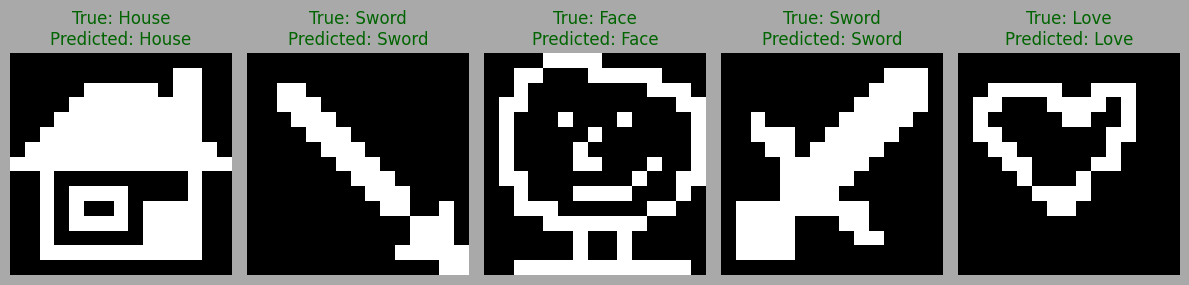

In [11]:
# @title **Make inferences on Test dataset**
#@markdown <- [Please! Click on the play button to proceed]

#@markdown Select a random samples from the test dataset and view predicted vs real values
random.seed(1)
sample_indices = random.sample(range(len(y_test)), k=5)
y_pred = clf.predict(X_test)
# Plot the selected samples
fig, axs = plt.subplots(1, len(sample_indices), figsize=(12, 3), facecolor='darkgray')

for i, index in enumerate(sample_indices):
    # Display the image
    axs[i].imshow(X_test[index].reshape(img_size, img_size), cmap='gray')

    # Set the title to the true label and predicted label
    true_label = y_test[index]
    predicted_label = y_pred[index]
    title = "True: {}\nPredicted: {}".format(true_label, predicted_label)
    if true_label == predicted_label:
        axs[i].set_title(title, color='darkgreen')
    else:
        axs[i].set_title(title, color='darkred')

    # Remove the axis ticks
    axs[i].axis('off')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


## **Visualize performance to asses overfitting**

In [12]:
# Compute cross-validation scores and mean accuracy
average_accuracy = np.mean(cvs := cross_val_score(clf, X, y, cv=5, scoring='accuracy'))
formatted_cv_scores = '\n'.join([f"  > Fold {i+1} - Accuracy: {score:.4f}" for i, score in enumerate(cvs)])
print(f"{formatted_cv_scores}\nAverage Accuracy = {average_accuracy:.4f}")

  > Fold 1 - Accuracy: 0.8485
  > Fold 2 - Accuracy: 0.8788
  > Fold 3 - Accuracy: 0.8485
  > Fold 4 - Accuracy: 0.8788
  > Fold 5 - Accuracy: 0.9688
Average Accuracy = 0.8847


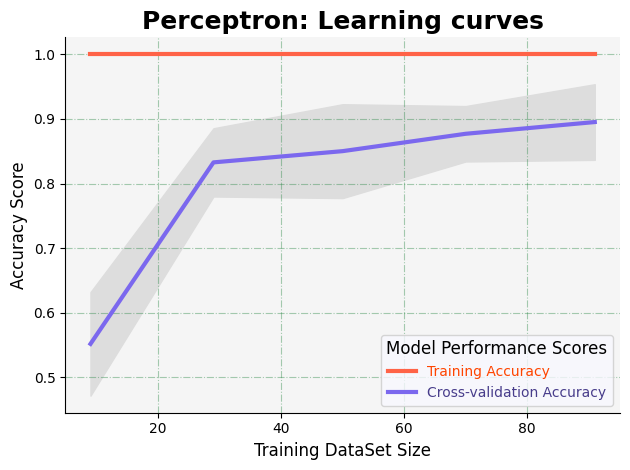

In [13]:
plot_learning_curve(clf, X_train, y_train)

In [14]:
# Evaluate accuracies scores
train_accuracy, test_accuracy = round(clf.score(X_train, y_train), 3), round(clf.score(X_test, y_test), 3)
print(f"> Training Accuracy: {train_accuracy}\n> Testing Accuracy: {test_accuracy}")

> Training Accuracy: 1.0
> Testing Accuracy: 0.84


In [15]:
print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

        Face       0.82      0.82      0.82        11
       House       1.00      0.50      0.67        10
        Love       0.91      0.91      0.91        11
       Sword       0.78      1.00      0.88        18

    accuracy                           0.84        50
   macro avg       0.88      0.81      0.82        50
weighted avg       0.86      0.84      0.83        50



---
---

# Make up your own data and test my model

> **How to use:**
1. Draw anything on the WhiteBoard.
2. Save/download your drawing by clicking the button provided.
3. Upload your photo in the last cell of the notebook
4. Check if the prediction is accurate to your expectations.

In [16]:
#@title Draw your image
#@markdown ### <- **[Please! Click on the play button to run the code]**

#@markdown > Draw anything you like, current trained classes are `Human face`, `House`, `Sword` and `Heart icon`.
#@markdown > But you can try drawing whatever you want and see what does the model thinks it is.

display(WhiteBoard)


<IPython.core.display.Javascript object>

In [17]:
#@title Upload your image/s
#@markdown ### <-**[Please! Click on the play button to run the code]**
#@markdown - Select the image/s you want to analyze for prediction.
from google.colab import files

uploaded = files.upload()
num_images = len(uploaded)

for i, filename in enumerate(uploaded.keys()):
    img_path = '/content/' + filename

    drawn_image = preprocess_image(img_path)
    prediction = clf.predict(drawn_image)
    print("-" * 30)
    print(f"> Image {i + 1} of {num_images} - Prediction: {prediction}")


Saving drawing.png to drawing (2).png
------------------------------
> Image 1 of 1 - Prediction: ['Face']


---

> Please note that the main purpose of this notebook is to demonstrate the implementation of a WhiteBoard on the Google Colaboratory environment, rather than focusing on the classification model itself.

This notebook serves as a demonstration of the WhiteBoard feature, showcasing its functionality within the Colaboratory environment. The emphasis is on the implementation of the WhiteBoard, not on the intricacies of the classification model itself.